In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from scipy import stats

In [2]:
# Read in the data
flights_data = pd.read_csv("cleansheet1.csv")
flights_data.head()

,Month,Country to/from,Passengers In,Freight In,Mail In,Passengers Out,Freight Out,Mail Out,Year
0,Jan009,Argentina,"3,021",4.3,0.6,"1,959",8.3,0.0,2009
1,Jan009,New Zealand,627,76.3,0.0,"1,821",68.5,0.0,2009
2,Jan009,New Caledonia,"6,658",4.9,0.6,"5,365",68.6,1.3,2009
3,Jan009,Canada,"7,489",174.8,0.0,"6,424",105.2,0.0,2009
4,Jan009,China,"12,458",201.3,18.6,"11,163",142.4,2.9,2009


In [3]:
# create new dataframe for freight information only
freight_df = flights_data[["Month", "Country to/from", "Freight In", "Freight Out", "Year"]]


In [4]:
# check column types
print (freight_df.dtypes)

Month              object
Country to/from    object
Freight In         object
Freight Out        object
Year                int64
dtype: object


In [5]:
# remove commas from freight in and out columns
freight_df = freight_df.replace(',','', regex=True)

In [6]:
# check commas have been removed
freight_df

,Month,Country to/from,Freight In,Freight Out,Year
0,Jan009,Argentina,4.3,8.3,2009
1,Jan009,New Zealand,76.3,68.5,2009
2,Jan009,New Caledonia,4.9,68.6,2009
3,Jan009,Canada,174.8,105.2,2009
4,Jan009,China,201.3,142.4,2009
...,...,...,...,...,...
15052,Nov020,Korea,..,254.8,2020
15053,Nov020,Singapore,..,28.9,2020
15054,Nov020,USA,1484.4,..,2020
15055,Nov020,Vietnam,437.1,534.2,2020


In [7]:
# remove missing values from freight In column in dataframe
freight_df.drop(freight_df[freight_df['Freight In'] == ".."].index, inplace = True)

In [8]:
# remove missing values from freight Out column in dataframe
freight_df.drop(freight_df[freight_df['Freight Out'] == ".."].index, inplace = True)

In [9]:
# change column types
freight_df['Freight In'] = freight_df['Freight In'].astype(float)
freight_df['Freight Out'] = freight_df['Freight Out'].astype(float)

In [10]:
# check column types
print (freight_df.dtypes)

Month               object
Country to/from     object
Freight In         float64
Freight Out        float64
Year                 int64
dtype: object


In [11]:
#filter data per month
# jan freight
freight_jan = freight_df[freight_df["Month"].isin(['Jan009', 'Jan010', 'Jan011', 'Jan012', 'Jan013', 'Jan014', 'Jan015', 'Jan016', 'Jan017', 'Jan018', 'Jan019', 'Jan020'])]
# feb freight
freight_feb = freight_df[freight_df["Month"].isin(['Feb009', 'Feb010', 'Feb011', 'Feb012', 'Feb013', 'Feb014', 'Feb015', 'Feb016', 'Feb017', 'Feb018', 'Feb019', 'Feb020'])]
# mar freight
freight_mar = freight_df[freight_df["Month"].isin(['Mar009', 'Mar010', 'Mar011', 'Mar012', 'Mar013', 'Mar014', 'Mar015', 'Mar016', 'Mar017', 'Mar018', 'Mar019', 'Mar020'])]
# apr freight
freight_apr = freight_df[freight_df["Month"].isin(['Apr009', 'Apr010', 'Apr011', 'Apr012', 'Apr013', 'Apr014', 'Apr015', 'Apr016', 'Apr017', 'Apr018', 'Apr019', 'Apr020'])]
# may freight
freight_may = freight_df[freight_df["Month"].isin(['May009', 'May010', 'May011', 'May012', 'May013', 'May014', 'May015', 'May016', 'May017', 'May018', 'May019', 'May020'])]
# jun freight
freight_jun = freight_df[freight_df["Month"].isin(['Jun009', 'Jun010', 'Jun011', 'Jun012', 'Jun013', 'Jun014', 'Jun015', 'Jun016', 'Jun017', 'Jun018', 'Jun019', 'Jun020'])]
# jul freight
freight_jul = freight_df[freight_df["Month"].isin(['Jul009', 'Jul010', 'Jul011', 'Jul012', 'Jul013', 'Jul014', 'Jul015', 'Jul016', 'Jul017', 'Jul018', 'Jul019', 'Jul020'])]
# aug freight
freight_aug = freight_df[freight_df["Month"].isin(['Aug009', 'Aug010', 'Aug011', 'Aug012', 'Aug013', 'Aug014', 'Aug015', 'Aug016', 'Aug017', 'Aug018', 'Aug019', 'Aug020'])]
# sep freight
freight_sep = freight_df[freight_df["Month"].isin(['Sep009', 'Sep010', 'Sep011', 'Sep012', 'Sep013', 'Sep014', 'Sep015', 'Sep016', 'Sep017', 'Sep018', 'Sep019', 'Sep020'])]
# oct freight
freight_oct = freight_df[freight_df["Month"].isin(['Oct009', 'Oct010', 'Oct011', 'Oct012', 'Oct013', 'Oct014', 'Oct015', 'Oct016', 'Oct017', 'Oct018', 'Oct019', 'Oct020'])]
# nov freight
freight_nov = freight_df[freight_df["Month"].isin(['Nov009', 'Nov010', 'Nov011', 'Nov012', 'Nov013', 'Nov014', 'Nov015', 'Nov016', 'Nov017', 'Nov018', 'Nov019', 'Nov020'])]
# dec freight
freight_dec = freight_df[freight_df["Month"].isin(['Dec009', 'Dec010', 'Dec011', 'Dec012', 'Dec013', 'Dec014', 'Dec015', 'Dec016', 'Dec017', 'Dec018', 'Dec019', 'Dec020'])]

In [12]:
# Create and format dataframes for every year - summed with monthly freight in and out
# jan
freight_jan_grouped = freight_jan.groupby(["Month"], sort = False)
freight_jan_grouped_in = freight_jan_grouped["Freight In"].sum()
freight_jan_grouped_out = freight_jan_grouped["Freight Out"].sum()
freight_jan_df = pd.DataFrame({'Freight In': freight_jan_grouped_in,
                   'Freight Out': freight_jan_grouped_out})
freight_jan_df = freight_jan_df.reset_index()
freight_jan_df['Month'] = freight_jan_df['Month'].replace(["Jan009", "Jan010", "Jan011", "Jan012", "Jan013", "Jan014", "Jan015", "Jan016", "Jan017", "Jan018", "Jan019", "Jan020",],'Jan')
freight_jan_df.insert(1, "Year", [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], allow_duplicates=False)

# feb
freight_feb_grouped = freight_feb.groupby(["Month"], sort = False)
freight_feb_grouped_in = freight_feb_grouped["Freight In"].sum()
freight_feb_grouped_out = freight_feb_grouped["Freight Out"].sum()
freight_feb_df = pd.DataFrame({'Freight In': freight_feb_grouped_in,
                   'Freight Out': freight_feb_grouped_out})
freight_feb_df = freight_feb_df.reset_index()
freight_feb_df['Month'] = freight_feb_df['Month'].replace(["Feb009", "Feb010", "Feb011", "Feb012", "Feb013", "Feb014", "Feb015", "Feb016", "Feb017", "Feb018", "Feb019", "Feb020",],'Feb')
freight_feb_df.insert(1, "Year", [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], allow_duplicates=False)

# mar
freight_mar_grouped = freight_mar.groupby(["Month"], sort = False)
freight_mar_grouped_in = freight_mar_grouped["Freight In"].sum()
freight_mar_grouped_out = freight_mar_grouped["Freight Out"].sum()
freight_mar_df = pd.DataFrame({'Freight In': freight_mar_grouped_in,
                   'Freight Out': freight_mar_grouped_out})
freight_mar_df = freight_mar_df.reset_index()
freight_mar_df['Month'] = freight_mar_df['Month'].replace(["Mar009", "Mar010", "Mar011", "Mar012", "Mar013", "Mar014", "Mar015", "Mar016", "Mar017", "Mar018", "Mar019", "Mar020",],'Mar')
freight_mar_df.insert(1, "Year", [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], allow_duplicates=False)

# apr
freight_apr_grouped = freight_apr.groupby(["Month"], sort = False)
freight_apr_grouped_in = freight_apr_grouped["Freight In"].sum()
freight_apr_grouped_out = freight_apr_grouped["Freight Out"].sum()
freight_apr_df = pd.DataFrame({'Freight In': freight_apr_grouped_in,
                   'Freight Out': freight_apr_grouped_out})
freight_apr_df = freight_apr_df.reset_index()
freight_apr_df['Month'] = freight_apr_df['Month'].replace(["Apr009", "Apr010", "Apr011", "Apr012", "Apr013", "Apr014", "Apr015", "Apr016", "Apr017", "Apr018", "Apr019", "Apr020",],'Apr')
freight_apr_df.insert(1, "Year", [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], allow_duplicates=False)

# may
freight_may_grouped = freight_may.groupby(["Month"], sort = False)
freight_may_grouped_in = freight_may_grouped["Freight In"].sum()
freight_may_grouped_out = freight_may_grouped["Freight Out"].sum()
freight_may_df = pd.DataFrame({'Freight In': freight_may_grouped_in,
                   'Freight Out': freight_may_grouped_out})
freight_may_df = freight_may_df.reset_index()
freight_may_df['Month'] = freight_may_df['Month'].replace(["May009", "May010", "May011", "May012", "May013", "May014", "May015", "May016", "May017", "May018", "May019", "May020",],'May')
freight_may_df.insert(1, "Year", [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], allow_duplicates=False)

# jun
freight_jun_grouped = freight_jun.groupby(["Month"], sort = False)
freight_jun_grouped_in = freight_jun_grouped["Freight In"].sum()
freight_jun_grouped_out = freight_jun_grouped["Freight Out"].sum()
freight_jun_df = pd.DataFrame({'Freight In': freight_jun_grouped_in,
                   'Freight Out': freight_jun_grouped_out})
freight_jun_df = freight_jun_df.reset_index()
freight_jun_df['Month'] = freight_jun_df['Month'].replace(["Jun009", "Jun010", "Jun011", "Jun012", "Jun013", "Jun014", "Jun015", "Jun016", "Jun017", "Jun018", "Jun019", "Jun020",],'Jun')
freight_jun_df.insert(1, "Year", [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], allow_duplicates=False)

# jul
freight_jul_grouped = freight_jul.groupby(["Month"], sort = False)
freight_jul_grouped_in = freight_jul_grouped["Freight In"].sum()
freight_jul_grouped_out = freight_jul_grouped["Freight Out"].sum()
freight_jul_df = pd.DataFrame({'Freight In': freight_jul_grouped_in,
                   'Freight Out': freight_jul_grouped_out})
freight_jul_df = freight_jul_df.reset_index()
freight_jul_df['Month'] = freight_jul_df['Month'].replace(["Jul009", "Jul010", "Jul011", "Jul012", "Jul013", "Jul014", "Jul015", "Jul016", "Jul017", "Jul018", "Jul019", "Jul020",],'Jul')
freight_jul_df.insert(1, "Year", [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], allow_duplicates=False)

# aug
freight_aug_grouped = freight_aug.groupby(["Month"], sort = False)
freight_aug_grouped_in = freight_aug_grouped["Freight In"].sum()
freight_aug_grouped_out = freight_aug_grouped["Freight Out"].sum()
freight_aug_df = pd.DataFrame({'Freight In': freight_aug_grouped_in,
                   'Freight Out': freight_aug_grouped_out})
freight_aug_df = freight_aug_df.reset_index()
freight_aug_df['Month'] = freight_aug_df['Month'].replace(["Aug009", "Aug010", "Aug011", "Aug012", "Aug013", "Aug014", "Aug015", "Aug016", "Aug017", "Aug018", "Aug019", "Aug020",],'Aug')
freight_aug_df.insert(1, "Year", [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], allow_duplicates=False)

# sep
freight_sep_grouped = freight_sep.groupby(["Month"], sort = False)
freight_sep_grouped_in = freight_sep_grouped["Freight In"].sum()
freight_sep_grouped_out = freight_sep_grouped["Freight Out"].sum()
freight_sep_df = pd.DataFrame({'Freight In': freight_sep_grouped_in,
                   'Freight Out': freight_sep_grouped_out})
freight_sep_df = freight_sep_df.reset_index()
freight_sep_df['Month'] = freight_sep_df['Month'].replace(["Sep009", "Sep010", "Sep011", "Sep012", "Sep013", "Sep014", "Sep015", "Sep016", "Sep017", "Sep018", "Sep019", "Sep020",],'Sep')
freight_sep_df.insert(1, "Year", [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], allow_duplicates=False)

# oct
freight_oct_grouped = freight_oct.groupby(["Month"], sort = False)
freight_oct_grouped_in = freight_oct_grouped["Freight In"].sum()
freight_oct_grouped_out = freight_oct_grouped["Freight Out"].sum()
freight_oct_df = pd.DataFrame({'Freight In': freight_oct_grouped_in,
                   'Freight Out': freight_oct_grouped_out})
freight_oct_df = freight_oct_df.reset_index()
freight_oct_df['Month'] = freight_oct_df['Month'].replace(["Oct009", "Oct010", "Oct011", "Oct012", "Oct013", "Oct014", "Oct015", "Oct016", "Oct017", "Oct018", "Oct019", "Oct020",],'Oct')
freight_oct_df.insert(1, "Year", [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], allow_duplicates=False)

# nov
freight_nov_grouped = freight_nov.groupby(["Month"], sort = False)
freight_nov_grouped_in = freight_nov_grouped["Freight In"].sum()
freight_nov_grouped_out = freight_nov_grouped["Freight Out"].sum()
freight_nov_df = pd.DataFrame({'Freight In': freight_nov_grouped_in,
                   'Freight Out': freight_nov_grouped_out})
freight_nov_df = freight_nov_df.reset_index()
freight_nov_df['Month'] = freight_nov_df['Month'].replace(["Nov009", "Nov010", "Nov011", "Nov012", "Nov013", "Nov014", "Nov015", "Nov016", "Nov017", "Nov018", "Nov019", "Nov020",],'Nov')
freight_nov_df.insert(1, "Year", [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], allow_duplicates=False)

# dec
freight_dec_grouped = freight_dec.groupby(["Month"], sort = False)
freight_dec_grouped_in = freight_dec_grouped["Freight In"].sum()
freight_dec_grouped_out = freight_dec_grouped["Freight Out"].sum()
freight_dec_df = pd.DataFrame({'Freight In': freight_dec_grouped_in,
                   'Freight Out': freight_dec_grouped_out})
freight_dec_df = freight_dec_df.reset_index()
freight_dec_df['Month'] = freight_dec_df['Month'].replace(["Dec009", "Dec010", "Dec011", "Dec012", "Dec013", "Dec014", "Dec015", "Dec016", "Dec017", "Dec018", "Dec019", "Dec020",],'Dec')
freight_dec_df.insert(1, "Year", [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], allow_duplicates=False)

In [13]:
# Create dataframes for every year excluding 2020- summed with monthly freight in and out
freight_19_jan_df = freight_jan_df[~freight_jan_df["Year"].isin([2020])]
freight_19_feb_df = freight_feb_df[~freight_feb_df["Year"].isin([2020])]
freight_19_mar_df = freight_mar_df[~freight_mar_df["Year"].isin([2020])]
freight_19_apr_df = freight_apr_df[~freight_apr_df["Year"].isin([2020])]
freight_19_may_df = freight_may_df[~freight_may_df["Year"].isin([2020])]
freight_19_jun_df = freight_jun_df[~freight_jun_df["Year"].isin([2020])]
freight_19_jul_df = freight_jul_df[~freight_jul_df["Year"].isin([2020])]
freight_19_aug_df = freight_aug_df[~freight_aug_df["Year"].isin([2020])]
freight_19_sep_df = freight_sep_df[~freight_sep_df["Year"].isin([2020])]
freight_19_oct_df = freight_oct_df[~freight_oct_df["Year"].isin([2020])]
freight_19_nov_df = freight_nov_df[~freight_nov_df["Year"].isin([2020])]
freight_19_dec_df = freight_dec_df

Text(0, 0.5, 'freight (in tonnes)')

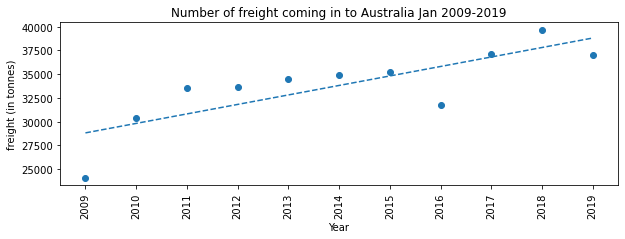

In [14]:
# scatter plot for January 2009-2019 incoming
# Plot the linear model 
year = freight_19_jan_df.iloc[:,1]
freight_in_jan = freight_19_jan_df.iloc[:,2]

# Perform a linear regression on year versus freight in
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(year, freight_in_jan)

 # Create equation of line to calculate predicted freight in
vc_fit = vc_slope * year + vc_int

plt.figure(figsize=(10,3))
plt.scatter(year,freight_in_jan)
plt.plot(year,vc_fit,"--")
plt.xticks(year, rotation=90)
plt.title("Number of freight coming in to Australia Jan 2009-2019")
plt.xlabel('Year')
plt.ylabel('freight (in tonnes)')

In [15]:
# forecast the incoming freight for 2020
year = 2020
year_2020_predict_jan_in = round(vc_slope * year + vc_int,2)
year_2020_predict_jan_in

39802.62

Text(0, 0.5, 'freight (in tonnes)')

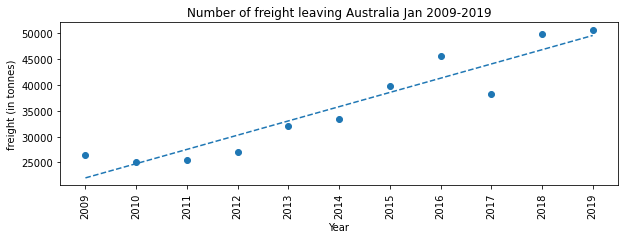

In [16]:
# scatter plot for January 2009-2019 outgoing
# Plot the linear model 
year = freight_19_jan_df.iloc[:,1]
freight_out_jan = freight_19_jan_df.iloc[:,3]

# Perform a linear regression on year versus freight out
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(year, freight_out_jan)

 # Create equation of line to calculate predicted freight out
vc_fit = vc_slope * year + vc_int

plt.figure(figsize=(10,3))
plt.scatter(year,freight_out_jan)
plt.plot(year,vc_fit,"--")
plt.xticks(year, rotation=90)
plt.title("Number of freight leaving Australia Jan 2009-2019")
plt.xlabel('Year')
plt.ylabel('freight (in tonnes)')

In [17]:
# forecast the outgoing freight for jan 2020
year = 2020
year_2020_predict_jan_out = round(vc_slope * year + vc_int,2)
year_2020_predict_jan_out

52356.98

In [18]:
# add predicted 2020 values to jan 2019 df
new_row = {'Month': "Jan", 'Year': 2020, 'Freight In': year_2020_predict_jan_in, 'Freight Out': year_2020_predict_jan_out}
#append row to the dataframe
freight_19_jan_df = freight_19_jan_df.append(new_row, ignore_index=True)

Text(0, 0.5, 'freight (in tonnes)')

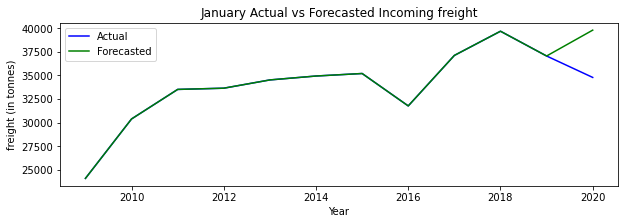

In [19]:
# plot graph showing overall expected vs real Jan values - incoming
x_jan_in_predict = freight_19_jan_df["Year"]
y_jan_in_act = freight_jan_df["Freight In"]
y_jan_in_pred = freight_19_jan_df["Freight In"]

plt.figure(figsize=(10,3))
plt.plot(x_jan_in_predict, y_jan_in_act, label='Actual', color='blue')
plt.plot(x_jan_in_predict, y_jan_in_pred, label='Forecasted', color='green')
plt.rcParams["figure.figsize"] = (12,7)
plt.legend()
plt.title("January Actual vs Forecasted Incoming freight")
plt.xlabel("Year")
plt.ylabel("freight (in tonnes)")

Text(0, 0.5, 'freight (in tonnes)')

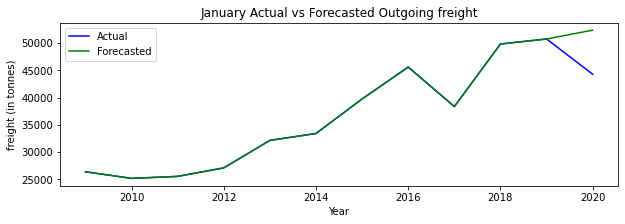

In [20]:
# plot graph showing overall expected vs real Jan values - outgoing
x_jan_out_predict = freight_19_jan_df["Year"]
y_jan_out_act = freight_jan_df["Freight Out"]
y_jan_out_pred = freight_19_jan_df["Freight Out"]

plt.figure(figsize=(10,3))
plt.plot(x_jan_out_predict, y_jan_out_act, label='Actual', color='blue')
plt.plot(x_jan_out_predict, y_jan_out_pred, label='Forecasted', color='green')
plt.rcParams["figure.figsize"] = (12,7)
plt.legend()
plt.title("January Actual vs Forecasted Outgoing freight")
plt.xlabel("Year")
plt.ylabel("freight (in tonnes)")

Text(0, 0.5, 'freight (in tonnes)')

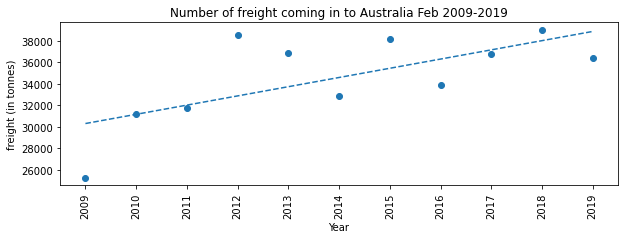

In [21]:
# scatter plot for February 2009-2019 incoming
# Plot the linear model 
year = freight_19_feb_df.iloc[:,1]
freight_in_feb = freight_19_feb_df.iloc[:,2]

# Perform a linear regression on year versus freight in
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(year, freight_in_feb)

 # Create equation of line to calculate predicted freight in
vc_fit = vc_slope * year + vc_int

plt.figure(figsize=(10,3))
plt.scatter(year,freight_in_feb)
plt.plot(year,vc_fit,"--")
plt.xticks(year, rotation=90)
plt.title("Number of freight coming in to Australia Feb 2009-2019")
plt.xlabel('Year')
plt.ylabel('freight (in tonnes)')

In [22]:
# forecast the incoming freight for 2020
year = 2020
year_2020_predict_feb_in = round(vc_slope * year + vc_int,2)

Text(0, 0.5, 'freight (in tonnes)')

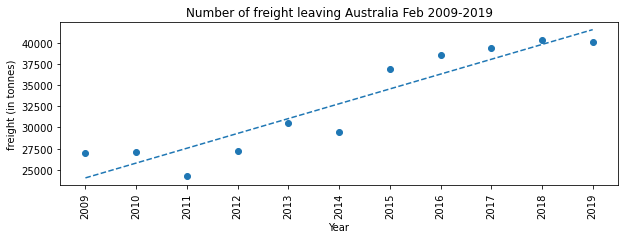

In [23]:
# scatter plot for February 2009-2019 outgoing
# Plot the linear model 
year = freight_19_feb_df.iloc[:,1]
freight_out_feb = freight_19_feb_df.iloc[:,3]

# Perform a linear regression on year versus freight out
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(year, freight_out_feb)

 # Create equation of line to calculate predicted freight out
vc_fit = vc_slope * year + vc_int

plt.figure(figsize=(10,3))
plt.scatter(year,freight_out_feb)
plt.plot(year,vc_fit,"--")
plt.xticks(year, rotation=90)
plt.title("Number of freight leaving Australia Feb 2009-2019")
plt.xlabel('Year')
plt.ylabel('freight (in tonnes)')

In [24]:
# forecast the outgoing freight for feb 2020
year = 2020
year_2020_predict_feb_out = round(vc_slope * year + vc_int,2)

In [25]:
# add predicted 2020 values to feb 2019 df
new_row = {'Month': "Feb", 'Year': 2020, 'Freight In': year_2020_predict_feb_in, 'Freight Out': year_2020_predict_feb_out}
#append row to the dataframe
freight_19_feb_df = freight_19_feb_df.append(new_row, ignore_index=True)

Text(0, 0.5, 'freight (in tonnes)')

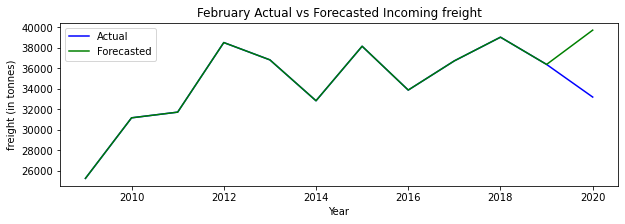

In [26]:
# plot graph showing overall expected vs real Feb values - incoming
x_feb_in_predict = freight_19_feb_df["Year"]
y_feb_in_act = freight_feb_df["Freight In"]
y_feb_in_pred = freight_19_feb_df["Freight In"]

plt.figure(figsize=(10,3))
plt.plot(x_feb_in_predict, y_feb_in_act, label='Actual', color='blue')
plt.plot(x_feb_in_predict, y_feb_in_pred, label='Forecasted', color='green')
plt.rcParams["figure.figsize"] = (12,7)
plt.legend()
plt.title("February Actual vs Forecasted Incoming freight")
plt.xlabel("Year")
plt.ylabel("freight (in tonnes)")

Text(0, 0.5, 'freight (in tonnes)')

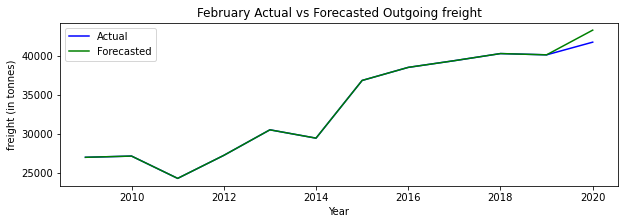

In [27]:
# plot graph showing overall expected vs real feb values - outgoing
x_feb_out_predict = freight_19_feb_df["Year"]
y_feb_out_act = freight_feb_df["Freight Out"]
y_feb_out_pred = freight_19_feb_df["Freight Out"]

plt.figure(figsize=(10,3))
plt.plot(x_feb_out_predict, y_feb_out_act, label='Actual', color='blue')
plt.plot(x_feb_out_predict, y_feb_out_pred, label='Forecasted', color='green')
plt.rcParams["figure.figsize"] = (12,7)
plt.legend()
plt.title("February Actual vs Forecasted Outgoing freight")
plt.xlabel("Year")
plt.ylabel("freight (in tonnes)")

Text(0, 0.5, 'freight (in tonnes)')

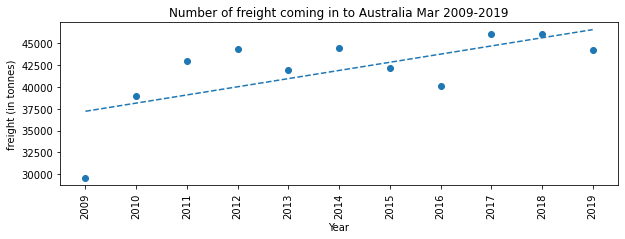

In [28]:
# scatter plot for March 2009-2019 incoming
# Plot the linear model 
year = freight_19_mar_df.iloc[:,1]
freight_in_mar = freight_19_mar_df.iloc[:,2]

# Perform a linear regression on year versus freight in
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(year, freight_in_mar)

 # Create equation of line to calculate predicted freight in
vc_fit = vc_slope * year + vc_int

plt.figure(figsize=(10,3))
plt.scatter(year,freight_in_mar)
plt.plot(year,vc_fit,"--")
plt.xticks(year, rotation=90)
plt.title("Number of freight coming in to Australia Mar 2009-2019")
plt.xlabel('Year')
plt.ylabel('freight (in tonnes)')

In [29]:
# forecast the incoming freight for 2020
year = 2020
year_2020_predict_mar_in = round(vc_slope * year + vc_int,2)

Text(0, 0.5, 'freight (in tonnes)')

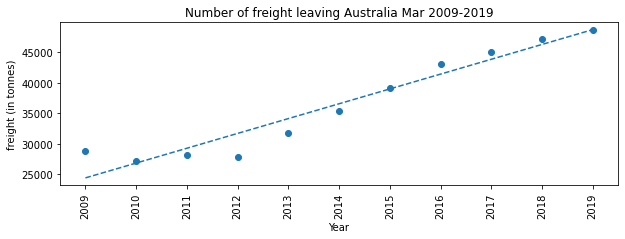

In [30]:
# scatter plot for March 2009-2019 outgoing
# Plot the linear model 
year = freight_19_mar_df.iloc[:,1]
freight_out_mar = freight_19_mar_df.iloc[:,3]

# Perform a linear regression on year versus freight out
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(year, freight_out_mar)

 # Create equation of line to calculate predicted freight out
vc_fit = vc_slope * year + vc_int

plt.figure(figsize=(10,3))
plt.scatter(year,freight_out_mar)
plt.plot(year,vc_fit,"--")
plt.xticks(year, rotation=90)
plt.title("Number of freight leaving Australia Mar 2009-2019")
plt.xlabel('Year')
plt.ylabel('freight (in tonnes)')

In [31]:
# forecast the outgoing freight for mar 2020
year = 2020
year_2020_predict_mar_out = round(vc_slope * year + vc_int,2)

In [32]:
# add predicted 2020 values to feb 2019 df
new_row = {'Month': "mar", 'Year': 2020, 'Freight In': year_2020_predict_mar_in, 'Freight Out': year_2020_predict_mar_out}
#append row to the dataframe
freight_19_mar_df = freight_19_mar_df.append(new_row, ignore_index=True)

Text(0, 0.5, 'freight (in tonnes)')

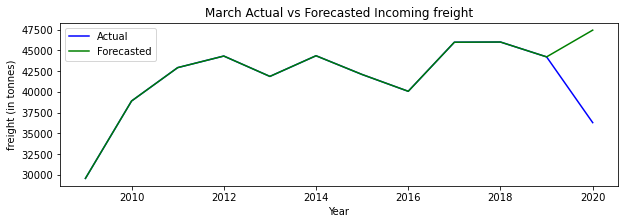

In [33]:
# plot graph showing overall expected vs real mar values - incoming
x_mar_in_predict = freight_19_mar_df["Year"]
y_mar_in_act = freight_mar_df["Freight In"]
y_mar_in_pred = freight_19_mar_df["Freight In"]

plt.figure(figsize=(10,3))
plt.plot(x_mar_in_predict, y_mar_in_act, label='Actual', color='blue')
plt.plot(x_mar_in_predict, y_mar_in_pred, label='Forecasted', color='green')
plt.rcParams["figure.figsize"] = (12,7)
plt.legend()
plt.title("March Actual vs Forecasted Incoming freight")
plt.xlabel("Year")
plt.ylabel("freight (in tonnes)")

Text(0, 0.5, 'freight (in tonnes)')

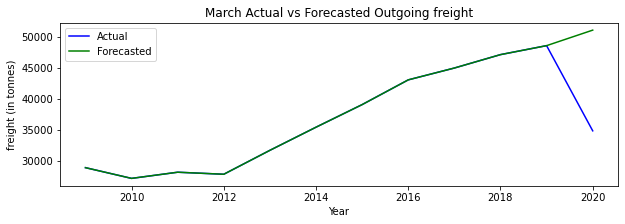

In [34]:
# plot graph showing overall expected vs real mar values - outgoing
x_mar_out_predict = freight_19_mar_df["Year"]
y_mar_out_act = freight_mar_df["Freight Out"]
y_mar_out_pred = freight_19_mar_df["Freight Out"]

plt.figure(figsize=(10,3))
plt.plot(x_mar_out_predict, y_mar_out_act, label='Actual', color='blue')
plt.plot(x_mar_out_predict, y_mar_out_pred, label='Forecasted', color='green')
plt.rcParams["figure.figsize"] = (12,7)
plt.legend()
plt.title("March Actual vs Forecasted Outgoing freight")
plt.xlabel("Year")
plt.ylabel("freight (in tonnes)")

Text(0, 0.5, 'freight (in tonnes)')

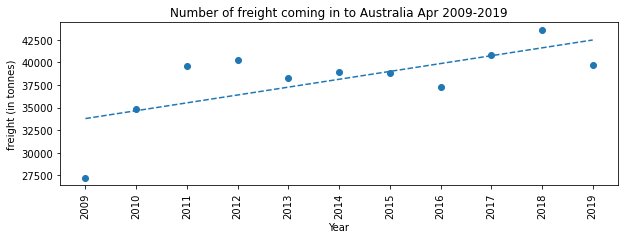

In [35]:
# scatter plot for April 2009-2019 incoming
# Plot the linear model 
year = freight_19_apr_df.iloc[:,1]
freight_in_apr = freight_19_apr_df.iloc[:,2]

# Perform a linear regression on year versus freight in
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(year, freight_in_apr)

 # Create equation of line to calculate predicted freight in
vc_fit = vc_slope * year + vc_int

plt.figure(figsize=(10,3))
plt.scatter(year,freight_in_apr)
plt.plot(year,vc_fit,"--")
plt.xticks(year, rotation=90)
plt.title("Number of freight coming in to Australia Apr 2009-2019")
plt.xlabel('Year')
plt.ylabel('freight (in tonnes)')

In [36]:
# forecast the incoming freight for 2020
year = 2020
year_2020_predict_apr_in = round(vc_slope * year + vc_int,2)

Text(0, 0.5, 'freight (in tonnes)')

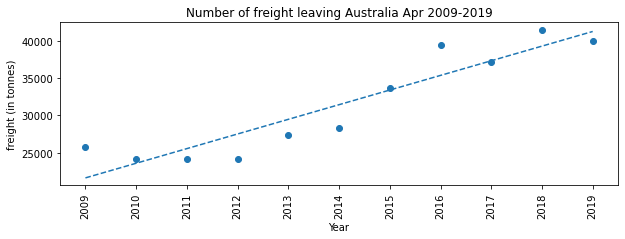

In [37]:
# scatter plot for April 2009-2019 outgoing
# Plot the linear model 
year = freight_19_apr_df.iloc[:,1]
freight_out_apr = freight_19_apr_df.iloc[:,3]

# Perform a linear regression on year versus freight out
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(year, freight_out_apr)

 # Create equation of line to calculate predicted freight out
vc_fit = vc_slope * year + vc_int

plt.figure(figsize=(10,3))
plt.scatter(year,freight_out_apr)
plt.plot(year,vc_fit,"--")
plt.xticks(year, rotation=90)
plt.title("Number of freight leaving Australia Apr 2009-2019")
plt.xlabel('Year')
plt.ylabel('freight (in tonnes)')

In [38]:
# forecast the outgoing freight for feb 2020
year = 2020
year_2020_predict_apr_out = round(vc_slope * year + vc_int,2)

In [39]:
# add predicted 2020 values to apr 2019 df
new_row = {'Month': "Apr", 'Year': 2020, 'Freight In': year_2020_predict_apr_in, 'Freight Out': year_2020_predict_apr_out}
#append row to the dataframe
freight_19_apr_df = freight_19_apr_df.append(new_row, ignore_index=True)

Text(0, 0.5, 'freight (in tonnes)')

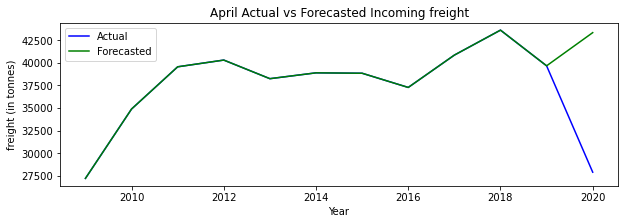

In [40]:
# plot graph showing overall expected vs real apr values - incoming
x_apr_in_predict = freight_19_apr_df["Year"]
y_apr_in_act = freight_apr_df["Freight In"]
y_apr_in_pred = freight_19_apr_df["Freight In"]

plt.figure(figsize=(10,3))
plt.plot(x_apr_in_predict, y_apr_in_act, label='Actual', color='blue')
plt.plot(x_apr_in_predict, y_apr_in_pred, label='Forecasted', color='green')
plt.rcParams["figure.figsize"] = (12,7)
plt.legend()
plt.title("April Actual vs Forecasted Incoming freight")
plt.xlabel("Year")
plt.ylabel("freight (in tonnes)")

Text(0, 0.5, 'freight (in tonnes)')

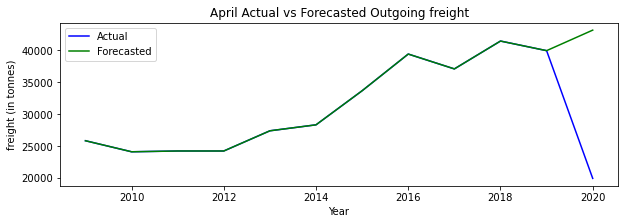

In [41]:
# plot graph showing overall expected vs real apr values - outgoing
x_apr_out_predict = freight_19_apr_df["Year"]
y_apr_out_act = freight_apr_df["Freight Out"]
y_apr_out_pred = freight_19_apr_df["Freight Out"]

plt.figure(figsize=(10,3))
plt.plot(x_apr_out_predict, y_apr_out_act, label='Actual', color='blue')
plt.plot(x_apr_out_predict, y_apr_out_pred, label='Forecasted', color='green')
plt.rcParams["figure.figsize"] = (12,7)
plt.legend()
plt.title("April Actual vs Forecasted Outgoing freight")
plt.xlabel("Year")
plt.ylabel("freight (in tonnes)")

Text(0, 0.5, 'freight (in tonnes)')

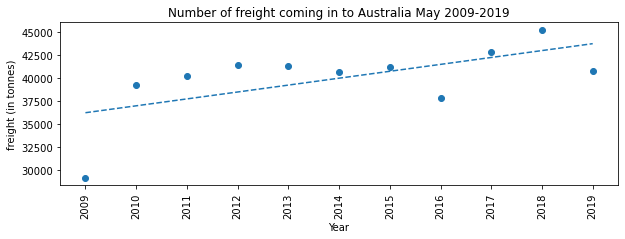

In [42]:
# scatter plot for May 2009-2019 incoming
# Plot the linear model 
year = freight_19_may_df.iloc[:,1]
freight_in_may = freight_19_may_df.iloc[:,2]

# Perform a linear regression on year versus freight in
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(year, freight_in_may)

 # Create equation of line to calculate predicted freight in
vc_fit = vc_slope * year + vc_int

plt.figure(figsize=(10,3))
plt.scatter(year,freight_in_may)
plt.plot(year,vc_fit,"--")
plt.xticks(year, rotation=90)
plt.title("Number of freight coming in to Australia May 2009-2019")
plt.xlabel('Year')
plt.ylabel('freight (in tonnes)')

In [43]:
# forecast the incoming freight for 2020
year = 2020
year_2020_predict_may_in = round(vc_slope * year + vc_int,2)

Text(0, 0.5, 'freight (in tonnes)')

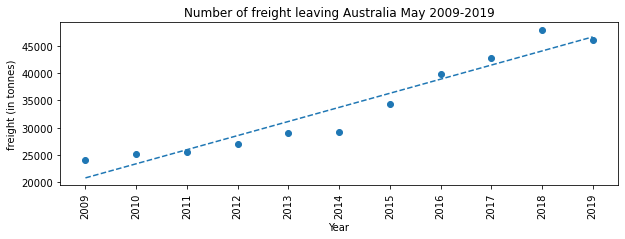

In [44]:
# scatter plot for May 2009-2019 outgoing
# Plot the linear model 
year = freight_19_may_df.iloc[:,1]
freight_out_may = freight_19_may_df.iloc[:,3]

# Perform a linear regression on year versus freight out
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(year, freight_out_may)

 # Create equation of line to calculate predicted freight out
vc_fit = vc_slope * year + vc_int

plt.figure(figsize=(10,3))
plt.scatter(year,freight_out_may)
plt.plot(year,vc_fit,"--")
plt.xticks(year, rotation=90)
plt.title("Number of freight leaving Australia May 2009-2019")
plt.xlabel('Year')
plt.ylabel('freight (in tonnes)')

In [45]:
# forecast the outgoing freight for may 2020
year = 2020
year_2020_predict_may_out = round(vc_slope * year + vc_int,2)

In [46]:
# add predicted 2020 values to may 2019 df
new_row = {'Month': "May", 'Year': 2020, 'Freight In': year_2020_predict_may_in, 'Freight Out': year_2020_predict_may_out}
#append row to the dataframe
freight_19_may_df = freight_19_may_df.append(new_row, ignore_index=True)

Text(0, 0.5, 'freight (in tonnes)')

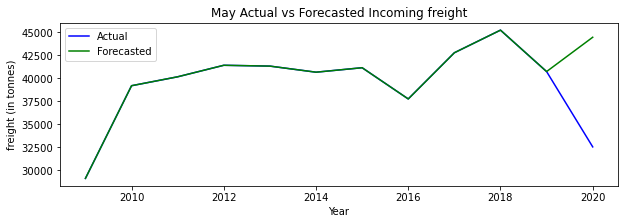

In [47]:
# plot graph showing overall expected vs real May values - incoming
x_may_in_predict = freight_19_may_df["Year"]
y_may_in_act = freight_may_df["Freight In"]
y_may_in_pred = freight_19_may_df["Freight In"]

plt.figure(figsize=(10,3))
plt.plot(x_may_in_predict, y_may_in_act, label='Actual', color='blue')
plt.plot(x_may_in_predict, y_may_in_pred, label='Forecasted', color='green')
plt.rcParams["figure.figsize"] = (12,7)
plt.legend()
plt.title("May Actual vs Forecasted Incoming freight")
plt.xlabel("Year")
plt.ylabel("freight (in tonnes)")

Text(0, 0.5, 'freight (in tonnes)')

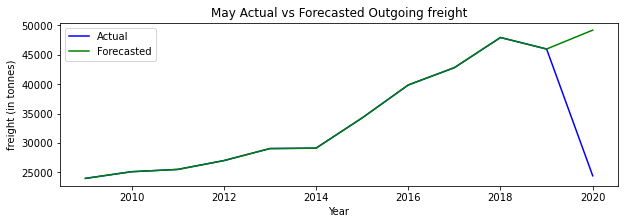

In [48]:
# plot graph showing overall expected vs real may values - outgoing
x_may_out_predict = freight_19_may_df["Year"]
y_may_out_act = freight_may_df["Freight Out"]
y_may_out_pred = freight_19_may_df["Freight Out"]

plt.figure(figsize=(10,3))
plt.plot(x_may_out_predict, y_may_out_act, label='Actual', color='blue')
plt.plot(x_may_out_predict, y_may_out_pred, label='Forecasted', color='green')
plt.rcParams["figure.figsize"] = (12,7)
plt.legend()
plt.title("May Actual vs Forecasted Outgoing freight")
plt.xlabel("Year")
plt.ylabel("freight (in tonnes)")

Text(0, 0.5, 'freight (in tonnes)')

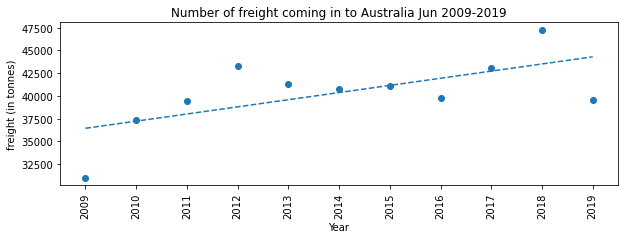

In [49]:
# scatter plot for June 2009-2019 incoming
# Plot the linear model 
year = freight_19_jun_df.iloc[:,1]
freight_in_jun = freight_19_jun_df.iloc[:,2]

# Perform a linear regression on year versus freight in
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(year, freight_in_jun)

 # Create equation of line to calculate predicted freight in
vc_fit = vc_slope * year + vc_int

plt.figure(figsize=(10,3))
plt.scatter(year,freight_in_jun)
plt.plot(year,vc_fit,"--")
plt.xticks(year, rotation=90)
plt.title("Number of freight coming in to Australia Jun 2009-2019")
plt.xlabel('Year')
plt.ylabel('freight (in tonnes)')

In [50]:
# forecast the incoming freight for 2020
year = 2020
year_2020_predict_jun_in = round(vc_slope * year + vc_int,2)

Text(0, 0.5, 'freight (in tonnes)')

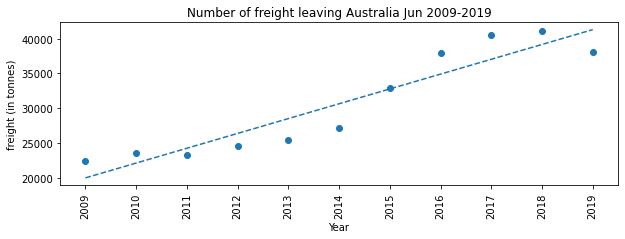

In [51]:
# scatter plot for June 2009-2019 outgoing
# Plot the linear model 
year = freight_19_jun_df.iloc[:,1]
freight_out_jun = freight_19_jun_df.iloc[:,3]

# Perform a linear regression on year versus freight out
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(year, freight_out_jun)

 # Create equation of line to calculate predicted freight out
vc_fit = vc_slope * year + vc_int

plt.figure(figsize=(10,3))
plt.scatter(year,freight_out_jun)
plt.plot(year,vc_fit,"--")
plt.xticks(year, rotation=90)
plt.title("Number of freight leaving Australia Jun 2009-2019")
plt.xlabel('Year')
plt.ylabel('freight (in tonnes)')

In [52]:
# forecast the outgoing freight for jun 2020
year = 2020
year_2020_predict_jun_out = round(vc_slope * year + vc_int,2)

In [53]:
# add predicted 2020 values to jun 2019 df
new_row = {'Month': "Jun", 'Year': 2020, 'Freight In': year_2020_predict_jun_in, 'Freight Out': year_2020_predict_jun_out}
#append row to the dataframe
freight_19_jun_df = freight_19_jun_df.append(new_row, ignore_index=True)

Text(0, 0.5, 'freight (in tonnes)')

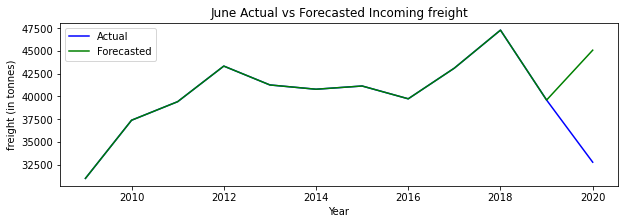

In [54]:
# plot graph showing overall expected vs real Jun values - incoming
x_jun_in_predict = freight_19_jun_df["Year"]
y_jun_in_act = freight_jun_df["Freight In"]
y_jun_in_pred = freight_19_jun_df["Freight In"]

plt.figure(figsize=(10,3))
plt.plot(x_jun_in_predict, y_jun_in_act, label='Actual', color='blue')
plt.plot(x_jun_in_predict, y_jun_in_pred, label='Forecasted', color='green')
plt.rcParams["figure.figsize"] = (12,7)
plt.legend()
plt.title("June Actual vs Forecasted Incoming freight")
plt.xlabel("Year")
plt.ylabel("freight (in tonnes)")

Text(0, 0.5, 'freight (in tonnes)')

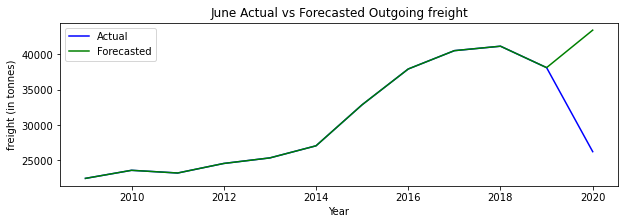

In [55]:
# plot graph showing overall expected vs real jun values - outgoing
x_jun_out_predict = freight_19_jun_df["Year"]
y_jun_out_act = freight_jun_df["Freight Out"]
y_jun_out_pred = freight_19_jun_df["Freight Out"]

plt.figure(figsize=(10,3))
plt.plot(x_jun_out_predict, y_jun_out_act, label='Actual', color='blue')
plt.plot(x_jun_out_predict, y_jun_out_pred, label='Forecasted', color='green')
plt.rcParams["figure.figsize"] = (12,7)
plt.legend()
plt.title("June Actual vs Forecasted Outgoing freight")
plt.xlabel("Year")
plt.ylabel("freight (in tonnes)")

Text(0, 0.5, 'freight (in tonnes)')

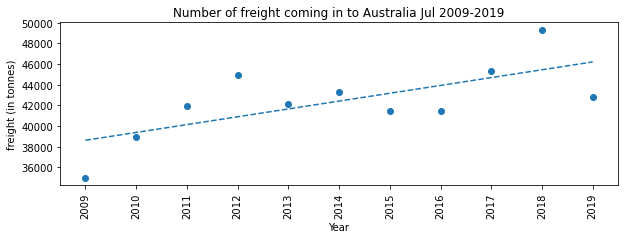

In [56]:
# scatter plot for July 2009-2019 incoming
# Plot the linear model 
year = freight_19_jul_df.iloc[:,1]
freight_in_jul = freight_19_jul_df.iloc[:,2]

# Perform a linear regression on year versus freight in
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(year, freight_in_jul)

 # Create equation of line to calculate predicted freight in
vc_fit = vc_slope * year + vc_int

plt.figure(figsize=(10,3))
plt.scatter(year,freight_in_jul)
plt.plot(year,vc_fit,"--")
plt.xticks(year, rotation=90)
plt.title("Number of freight coming in to Australia Jul 2009-2019")
plt.xlabel('Year')
plt.ylabel('freight (in tonnes)')

In [57]:
# forecast the incoming freight for 2020
year = 2020
year_2020_predict_jul_in = round(vc_slope * year + vc_int,2)

Text(0, 0.5, 'freight (in tonnes)')

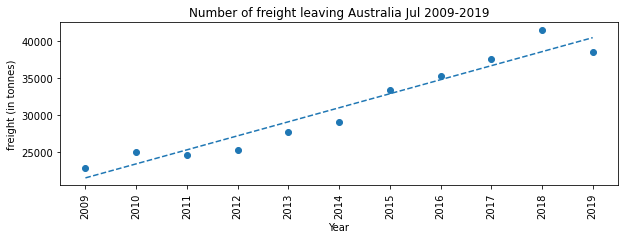

In [58]:
# scatter plot for July 2009-2019 outgoing
# Plot the linear model 
year = freight_19_jul_df.iloc[:,1]
freight_out_jul = freight_19_jul_df.iloc[:,3]

# Perform a linear regression on year versus freight out
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(year, freight_out_jul)

 # Create equation of line to calculate predicted freight out
vc_fit = vc_slope * year + vc_int

plt.figure(figsize=(10,3))
plt.scatter(year,freight_out_jul)
plt.plot(year,vc_fit,"--")
plt.xticks(year, rotation=90)
plt.title("Number of freight leaving Australia Jul 2009-2019")
plt.xlabel('Year')
plt.ylabel('freight (in tonnes)')

In [59]:
# forecast the outgoing freight for jul 2020
year = 2020
year_2020_predict_jul_out = round(vc_slope * year + vc_int,2)

In [60]:
# add predicted 2020 values to jul 2019 df
new_row = {'Month': "Jul", 'Year': 2020, 'Freight In': year_2020_predict_jul_in, 'Freight Out': year_2020_predict_jul_out}
#append row to the dataframe
freight_19_jul_df = freight_19_jul_df.append(new_row, ignore_index=True)

Text(0, 0.5, 'freight (in tonnes)')

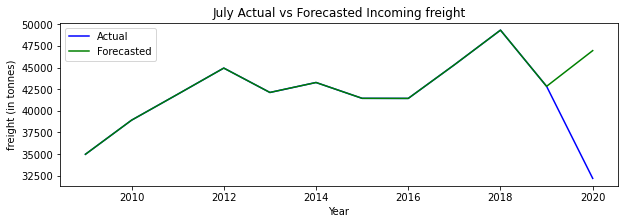

In [61]:
# plot graph showing overall expected vs real Jul values - incoming
x_jul_in_predict = freight_19_jul_df["Year"]
y_jul_in_act = freight_jul_df["Freight In"]
y_jul_in_pred = freight_19_jul_df["Freight In"]

plt.figure(figsize=(10,3))
plt.plot(x_jul_in_predict, y_jul_in_act, label='Actual', color='blue')
plt.plot(x_jul_in_predict, y_jul_in_pred, label='Forecasted', color='green')
plt.rcParams["figure.figsize"] = (12,7)
plt.legend()
plt.title("July Actual vs Forecasted Incoming freight")
plt.xlabel("Year")
plt.ylabel("freight (in tonnes)")

Text(0, 0.5, 'freight (in tonnes)')

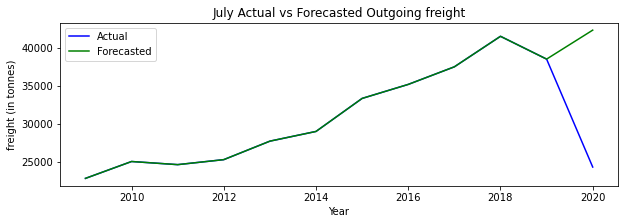

In [62]:
# plot graph showing overall expected vs real jul values - outgoing
x_jul_out_predict = freight_19_jul_df["Year"]
y_jul_out_act = freight_jul_df["Freight Out"]
y_jul_out_pred = freight_19_jul_df["Freight Out"]

plt.figure(figsize=(10,3))
plt.plot(x_jul_out_predict, y_jul_out_act, label='Actual', color='blue')
plt.plot(x_jul_out_predict, y_jul_out_pred, label='Forecasted', color='green')
plt.rcParams["figure.figsize"] = (12,7)
plt.legend()
plt.title("July Actual vs Forecasted Outgoing freight")
plt.xlabel("Year")
plt.ylabel("freight (in tonnes)")

Text(0, 0.5, 'freight (in tonnes)')

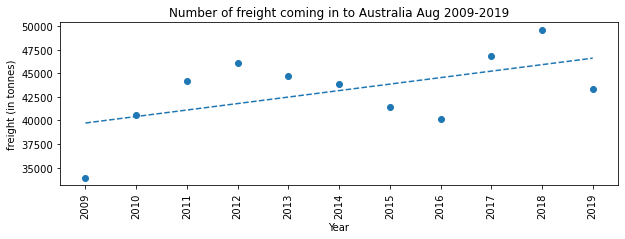

In [63]:
# scatter plot for August 2009-2019 incoming
# Plot the linear model 
year = freight_19_aug_df.iloc[:,1]
freight_in_aug = freight_19_aug_df.iloc[:,2]

# Perform a linear regression on year versus freight in
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(year, freight_in_aug)

 # Create equation of line to calculate predicted freight in
vc_fit = vc_slope * year + vc_int

plt.figure(figsize=(10,3))
plt.scatter(year,freight_in_aug)
plt.plot(year,vc_fit,"--")
plt.xticks(year, rotation=90)
plt.title("Number of freight coming in to Australia Aug 2009-2019")
plt.xlabel('Year')
plt.ylabel('freight (in tonnes)')

In [64]:
# forecast the incoming freight for 2020
year = 2020
year_2020_predict_aug_in = round(vc_slope * year + vc_int,2)

Text(0, 0.5, 'freight (in tonnes)')

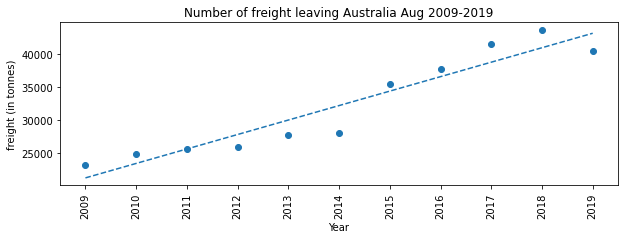

In [65]:
# scatter plot for August 2009-2019 outgoing
# Plot the linear model 
year = freight_19_aug_df.iloc[:,1]
freight_out_aug = freight_19_aug_df.iloc[:,3]

# Perform a linear regression on year versus freight out
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(year, freight_out_aug)

 # Create equation of line to calculate predicted freight out
vc_fit = vc_slope * year + vc_int

plt.figure(figsize=(10,3))
plt.scatter(year,freight_out_aug)
plt.plot(year,vc_fit,"--")
plt.xticks(year, rotation=90)
plt.title("Number of freight leaving Australia Aug 2009-2019")
plt.xlabel('Year')
plt.ylabel('freight (in tonnes)')

In [66]:
# forecast the outgoing freight for aug 2020
year = 2020
year_2020_predict_aug_out = round(vc_slope * year + vc_int,2)

In [67]:
# add predicted 2020 values to aug 2019 df
new_row = {'Month': "Aug", 'Year': 2020, 'Freight In': year_2020_predict_aug_in, 'Freight Out': year_2020_predict_aug_out}
#append row to the dataframe
freight_19_aug_df = freight_19_aug_df.append(new_row, ignore_index=True)

Text(0, 0.5, 'freight (in tonnes)')

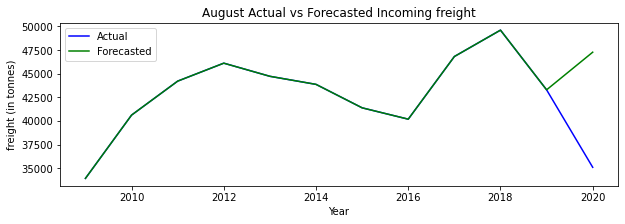

In [68]:
# plot graph showing overall expected vs real Aug values - incoming
x_aug_in_predict = freight_19_aug_df["Year"]
y_aug_in_act = freight_aug_df["Freight In"]
y_aug_in_pred = freight_19_aug_df["Freight In"]

plt.figure(figsize=(10,3))
plt.plot(x_aug_in_predict, y_aug_in_act, label='Actual', color='blue')
plt.plot(x_aug_in_predict, y_aug_in_pred, label='Forecasted', color='green')
plt.rcParams["figure.figsize"] = (12,7)
plt.legend()
plt.title("August Actual vs Forecasted Incoming freight")
plt.xlabel("Year")
plt.ylabel("freight (in tonnes)")

Text(0, 0.5, 'freight (in tonnes)')

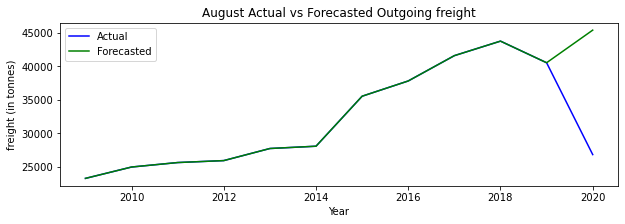

In [69]:
# plot graph showing overall expected vs real aug values - outgoing
x_aug_out_predict = freight_19_aug_df["Year"]
y_aug_out_act = freight_aug_df["Freight Out"]
y_aug_out_pred = freight_19_aug_df["Freight Out"]

plt.figure(figsize=(10,3))
plt.plot(x_aug_out_predict, y_aug_out_act, label='Actual', color='blue')
plt.plot(x_aug_out_predict, y_aug_out_pred, label='Forecasted', color='green')
plt.rcParams["figure.figsize"] = (12,7)
plt.legend()
plt.title("August Actual vs Forecasted Outgoing freight")
plt.xlabel("Year")
plt.ylabel("freight (in tonnes)")

Text(0, 0.5, 'freight (in tonnes)')

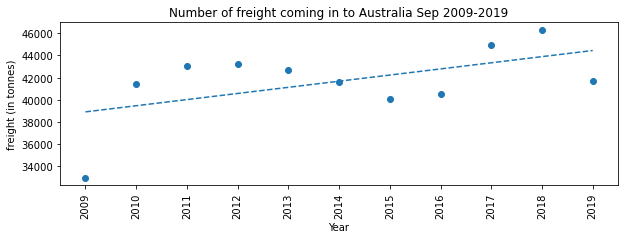

In [70]:
# scatter plot for September 2009-2019 incoming
# Plot the linear model 
year = freight_19_sep_df.iloc[:,1]
freight_in_sep = freight_19_sep_df.iloc[:,2]

# Perform a linear regression on year versus freight in
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(year, freight_in_sep)

 # Create equation of line to calculate predicted freight in
vc_fit = vc_slope * year + vc_int

plt.figure(figsize=(10,3))
plt.scatter(year,freight_in_sep)
plt.plot(year,vc_fit,"--")
plt.xticks(year, rotation=90)
plt.title("Number of freight coming in to Australia Sep 2009-2019")
plt.xlabel('Year')
plt.ylabel('freight (in tonnes)')

In [71]:
# forecast the incoming freight for 2020
year = 2020
year_2020_predict_sep_in = round(vc_slope * year + vc_int,2)

Text(0, 0.5, 'freight (in tonnes)')

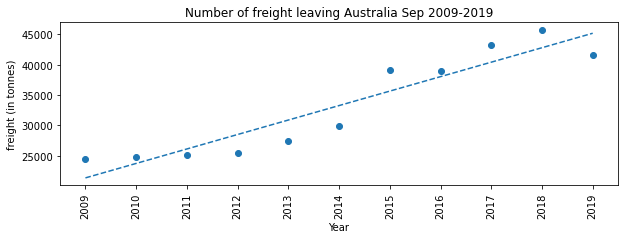

In [72]:
# scatter plot for September 2009-2019 outgoing
# Plot the linear model 
year = freight_19_sep_df.iloc[:,1]
freight_out_sep = freight_19_sep_df.iloc[:,3]

# Perform a linear regression on year versus freight out
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(year, freight_out_sep)

 # Create equation of line to calculate predicted freight out
vc_fit = vc_slope * year + vc_int

plt.figure(figsize=(10,3))
plt.scatter(year,freight_out_sep)
plt.plot(year,vc_fit,"--")
plt.xticks(year, rotation=90)
plt.title("Number of freight leaving Australia Sep 2009-2019")
plt.xlabel('Year')
plt.ylabel('freight (in tonnes)')

In [73]:
# forecast the outgoing freight for sep 2020
year = 2020
year_2020_predict_sep_out = round(vc_slope * year + vc_int,2)

In [74]:
# add predicted 2020 values to sep 2019 df
new_row = {'Month': "Sep", 'Year': 2020, 'Freight In': year_2020_predict_sep_in, 'Freight Out': year_2020_predict_sep_out}
#append row to the dataframe
freight_19_sep_df = freight_19_sep_df.append(new_row, ignore_index=True)

Text(0, 0.5, 'freight (in tonnes)')

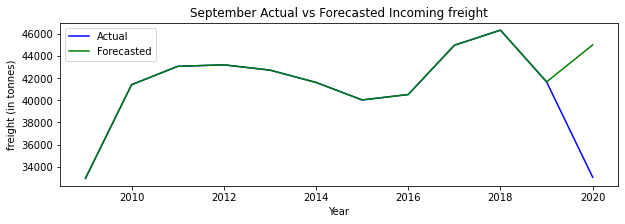

In [75]:
# plot graph showing overall expected vs real Sep values - incoming
x_sep_in_predict = freight_19_sep_df["Year"]
y_sep_in_act = freight_sep_df["Freight In"]
y_sep_in_pred = freight_19_sep_df["Freight In"]

plt.figure(figsize=(10,3))
plt.plot(x_sep_in_predict, y_sep_in_act, label='Actual', color='blue')
plt.plot(x_sep_in_predict, y_sep_in_pred, label='Forecasted', color='green')
plt.rcParams["figure.figsize"] = (12,7)
plt.legend()
plt.title("September Actual vs Forecasted Incoming freight")
plt.xlabel("Year")
plt.ylabel("freight (in tonnes)")

Text(0, 0.5, 'freight (in tonnes)')

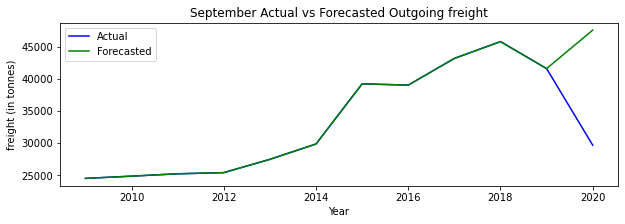

In [76]:
# plot graph showing overall expected vs real sep values - outgoing
x_sep_out_predict = freight_19_sep_df["Year"]
y_sep_out_act = freight_sep_df["Freight Out"]
y_sep_out_pred = freight_19_sep_df["Freight Out"]

plt.figure(figsize=(10,3))
plt.plot(x_sep_out_predict, y_sep_out_act, label='Actual', color='blue')
plt.plot(x_sep_out_predict, y_sep_out_pred, label='Forecasted', color='green')
plt.rcParams["figure.figsize"] = (12,7)
plt.legend()
plt.title("September Actual vs Forecasted Outgoing freight")
plt.xlabel("Year")
plt.ylabel("freight (in tonnes)")

Text(0, 0.5, 'freight (in tonnes)')

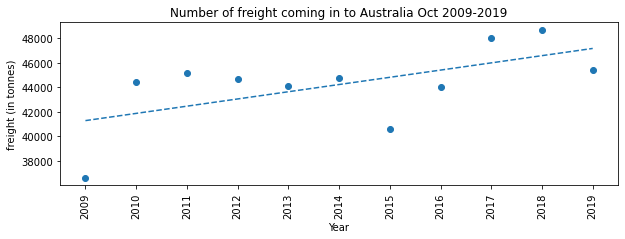

In [77]:
# scatter plot for October 2009-2019 incoming
# Plot the linear model 
year = freight_19_oct_df.iloc[:,1]
freight_in_oct = freight_19_oct_df.iloc[:,2]

# Perform a linear regression on year versus freight in
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(year, freight_in_oct)

 # Create equation of line to calculate predicted freight in
vc_fit = vc_slope * year + vc_int

plt.figure(figsize=(10,3))
plt.scatter(year,freight_in_oct)
plt.plot(year,vc_fit,"--")
plt.xticks(year, rotation=90)
plt.title("Number of freight coming in to Australia Oct 2009-2019")
plt.xlabel('Year')
plt.ylabel('freight (in tonnes)')

In [78]:
# forecast the incoming freight for 2020
year = 2020
year_2020_predict_oct_in = round(vc_slope * year + vc_int,2)

Text(0, 0.5, 'freight (in tonnes)')

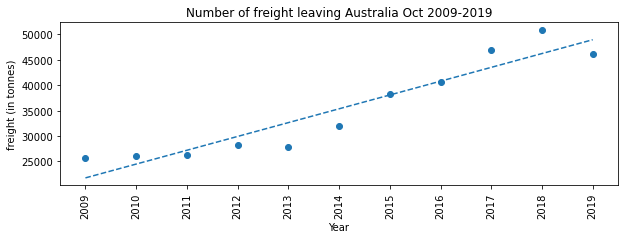

In [79]:
# scatter plot for October 2009-2019 outgoing
# Plot the linear model 
year = freight_19_oct_df.iloc[:,1]
freight_out_oct = freight_19_oct_df.iloc[:,3]

# Perform a linear regression on year versus freight out
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(year, freight_out_oct)

 # Create equation of line to calculate predicted freight out
vc_fit = vc_slope * year + vc_int

plt.figure(figsize=(10,3))
plt.scatter(year,freight_out_oct)
plt.plot(year,vc_fit,"--")
plt.xticks(year, rotation=90)
plt.title("Number of freight leaving Australia Oct 2009-2019")
plt.xlabel('Year')
plt.ylabel('freight (in tonnes)')

In [80]:
# forecast the outgoing freight for oct 2020
year = 2020
year_2020_predict_oct_out = round(vc_slope * year + vc_int,2)

In [81]:
# add predicted 2020 values to oct 2019 df
new_row = {'Month': "Oct", 'Year': 2020, 'Freight In': year_2020_predict_oct_in, 'Freight Out': year_2020_predict_oct_out}
#append row to the dataframe
freight_19_oct_df = freight_19_oct_df.append(new_row, ignore_index=True)

Text(0, 0.5, 'freight (in tonnes)')

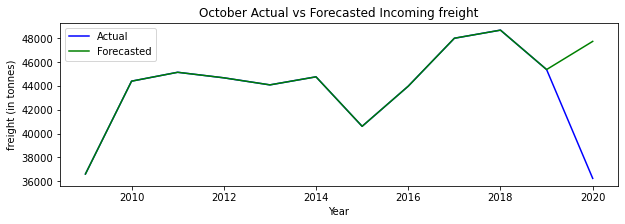

In [82]:
# plot graph showing overall expected vs real Oct values - incoming
x_oct_in_predict = freight_19_oct_df["Year"]
y_oct_in_act = freight_oct_df["Freight In"]
y_oct_in_pred = freight_19_oct_df["Freight In"]

plt.figure(figsize=(10,3))
plt.plot(x_oct_in_predict, y_oct_in_act, label='Actual', color='blue')
plt.plot(x_oct_in_predict, y_oct_in_pred, label='Forecasted', color='green')
plt.rcParams["figure.figsize"] = (12,7)
plt.legend()
plt.title("October Actual vs Forecasted Incoming freight")
plt.xlabel("Year")
plt.ylabel("freight (in tonnes)")

Text(0, 0.5, 'freight (in tonnes)')

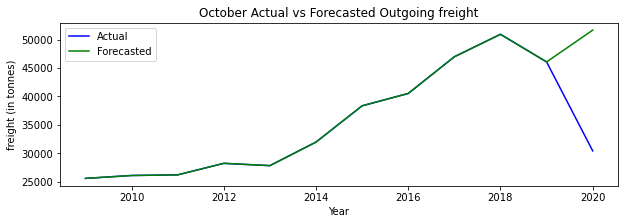

In [83]:
# plot graph showing overall expected vs real oct values - outgoing
x_oct_out_predict = freight_19_oct_df["Year"]
y_oct_out_act = freight_oct_df["Freight Out"]
y_oct_out_pred = freight_19_oct_df["Freight Out"]

plt.figure(figsize=(10,3))
plt.plot(x_oct_out_predict, y_oct_out_act, label='Actual', color='blue')
plt.plot(x_oct_out_predict, y_oct_out_pred, label='Forecasted', color='green')
plt.rcParams["figure.figsize"] = (12,7)
plt.legend()
plt.title("October Actual vs Forecasted Outgoing freight")
plt.xlabel("Year")
plt.ylabel("freight (in tonnes)")

Text(0, 0.5, 'freight (in tonnes)')

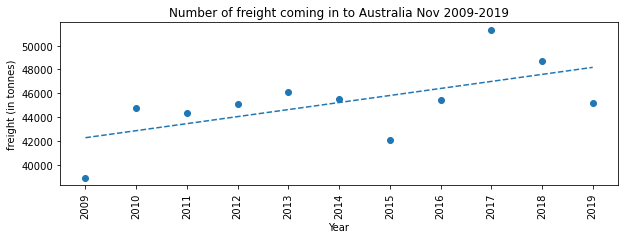

In [84]:
# scatter plot for November 2009-2019 incoming
# Plot the linear model 
year = freight_19_nov_df.iloc[:,1]
freight_in_nov = freight_19_nov_df.iloc[:,2]

# Perform a linear regression on year versus freight in
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(year, freight_in_nov)

 # Create equation of line to calculate predicted freight in
vc_fit = vc_slope * year + vc_int

plt.figure(figsize=(10,3))
plt.scatter(year,freight_in_nov)
plt.plot(year,vc_fit,"--")
plt.xticks(year, rotation=90)
plt.title("Number of freight coming in to Australia Nov 2009-2019")
plt.xlabel('Year')
plt.ylabel('freight (in tonnes)')

In [85]:
# forecast the incoming freight for 2020
year = 2020
year_2020_predict_nov_in = round(vc_slope * year + vc_int,2)

Text(0, 0.5, 'freight (in tonnes)')

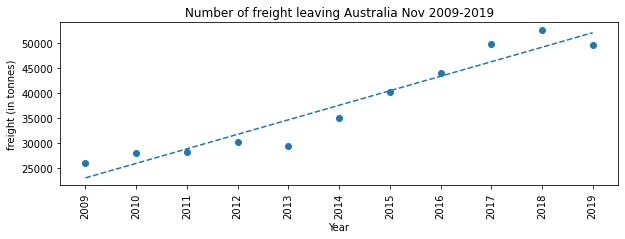

In [86]:
# scatter plot for November 2009-2019 outgoing
# Plot the linear model 
year = freight_19_nov_df.iloc[:,1]
freight_out_nov = freight_19_nov_df.iloc[:,3]

# Perform a linear regression on year versus freight out
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(year, freight_out_nov)

 # Create equation of line to calculate predicted freight out
vc_fit = vc_slope * year + vc_int

plt.figure(figsize=(10,3))
plt.scatter(year,freight_out_nov)
plt.plot(year,vc_fit,"--")
plt.xticks(year, rotation=90)
plt.title("Number of freight leaving Australia Nov 2009-2019")
plt.xlabel('Year')
plt.ylabel('freight (in tonnes)')

In [87]:
# forecast the outgoing freight for nov 2020
year = 2020
year_2020_predict_nov_out = round(vc_slope * year + vc_int,2)

In [88]:
# add predicted 2020 values to nov 2019 df
new_row = {'Month': "Nov", 'Year': 2020, 'Freight In': year_2020_predict_nov_in, 'Freight Out': year_2020_predict_nov_out}
#append row to the dataframe
freight_19_nov_df = freight_19_nov_df.append(new_row, ignore_index=True)

Text(0, 0.5, 'freight (in tonnes)')

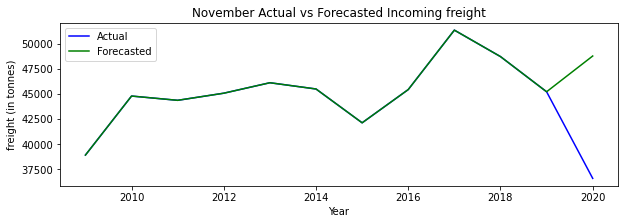

In [89]:
# plot graph showing overall expected vs real Nov values - incoming
x_nov_in_predict = freight_19_nov_df["Year"]
y_nov_in_act = freight_nov_df["Freight In"]
y_nov_in_pred = freight_19_nov_df["Freight In"]

plt.figure(figsize=(10,3))
plt.plot(x_nov_in_predict, y_nov_in_act, label='Actual', color='blue')
plt.plot(x_nov_in_predict, y_nov_in_pred, label='Forecasted', color='green')
plt.rcParams["figure.figsize"] = (12,7)
plt.legend()
plt.title("November Actual vs Forecasted Incoming freight")
plt.xlabel("Year")
plt.ylabel("freight (in tonnes)")

Text(0, 0.5, 'freight (in tonnes)')

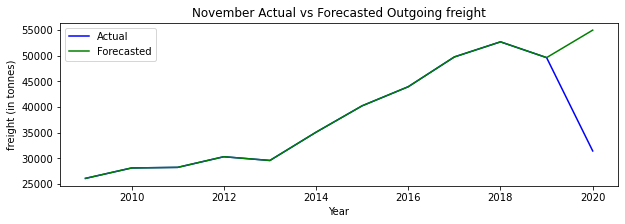

In [90]:
# plot graph showing overall expected vs real nov values - outgoing
x_nov_out_predict = freight_19_nov_df["Year"]
y_nov_out_act = freight_nov_df["Freight Out"]
y_nov_out_pred = freight_19_nov_df["Freight Out"]

plt.figure(figsize=(10,3))
plt.plot(x_nov_out_predict, y_nov_out_act, label='Actual', color='blue')
plt.plot(x_nov_out_predict, y_nov_out_pred, label='Forecasted', color='green')
plt.rcParams["figure.figsize"] = (12,7)
plt.legend()
plt.title("November Actual vs Forecasted Outgoing freight")
plt.xlabel("Year")
plt.ylabel("freight (in tonnes)")

Text(0, 0.5, 'freight (in tonnes)')

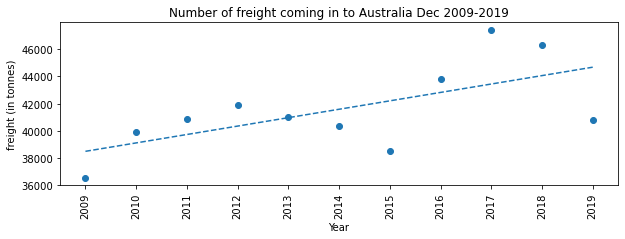

In [91]:
# scatter plot for December 2009-2019 incoming
# Plot the linear model 
year = freight_19_dec_df.iloc[:,1]
freight_in_dec = freight_19_dec_df.iloc[:,2]

# Perform a linear regression on year versus freight in
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(year, freight_in_dec)

 # Create equation of line to calculate predicted freight in
vc_fit = vc_slope * year + vc_int

plt.figure(figsize=(10,3))
plt.scatter(year,freight_in_dec)
plt.plot(year,vc_fit,"--")
plt.xticks(year, rotation=90)
plt.title("Number of freight coming in to Australia Dec 2009-2019")
plt.xlabel('Year')
plt.ylabel('freight (in tonnes)')

In [92]:
# forecast the incoming freight for 2020
year = 2020
year_2020_predict_dec_in = round(vc_slope * year + vc_int,2)

Text(0, 0.5, 'freight (in tonnes)')

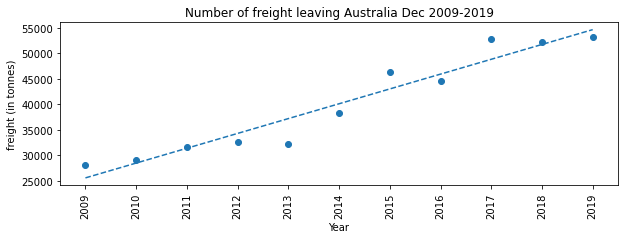

In [93]:
# scatter plot for December 2009-2019 outgoing
# Plot the linear model 
year = freight_19_dec_df.iloc[:,1]
freight_out_dec = freight_19_dec_df.iloc[:,3]

# Perform a linear regression on year versus freight out
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(year, freight_out_dec)

 # Create equation of line to calculate predicted freight out
vc_fit = vc_slope * year + vc_int

plt.figure(figsize=(10,3))
plt.scatter(year,freight_out_dec)
plt.plot(year,vc_fit,"--")
plt.xticks(year, rotation=90)
plt.title("Number of freight leaving Australia Dec 2009-2019")
plt.xlabel('Year')
plt.ylabel('freight (in tonnes)')

In [94]:
# forecast the outgoing freight for dec 2020
year = 2020
year_2020_predict_dec_out = round(vc_slope * year + vc_int,2)

In [95]:
# add predicted 2020 values to dec 2019 df
new_row = {'Month': "Dec", 'Year': 2020, 'Freight In': year_2020_predict_dec_in, 'Freight Out': year_2020_predict_dec_out}
#append row to the dataframe
freight_19_dec_df = freight_19_dec_df.append(new_row, ignore_index=True)

In [96]:
# manually add december actual value from 2019 as data is not available
december_placeholder = {'Month': "Dec", 'Year': 2020, 'Freight In': 40817.3, 'Freight Out': 53226.0}
#append row to the dataframe
freight_dec_df = freight_dec_df.append(december_placeholder, ignore_index=True)

Text(0, 0.5, 'freight (in tonnes)')

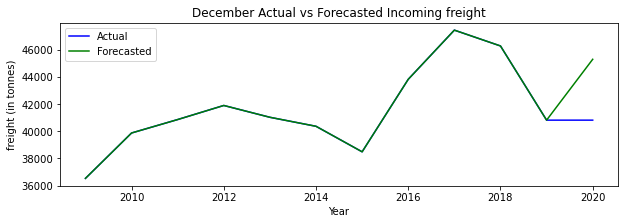

In [97]:
# plot graph showing overall expected vs real Dec values - incoming
x_dec_in_predict = freight_19_dec_df["Year"]
y_dec_in_act = freight_dec_df["Freight In"]
y_dec_in_pred = freight_19_dec_df["Freight In"]

plt.figure(figsize=(10,3))
plt.plot(x_dec_in_predict, y_dec_in_act, label='Actual', color='blue')
plt.plot(x_dec_in_predict, y_dec_in_pred, label='Forecasted', color='green')
plt.rcParams["figure.figsize"] = (12,7)
plt.legend()
plt.title("December Actual vs Forecasted Incoming freight")
plt.xlabel("Year")
plt.ylabel("freight (in tonnes)")

Text(0, 0.5, 'freight (in tonnes)')

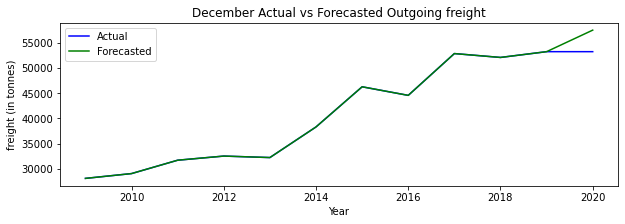

In [98]:
# plot graph showing overall expected vs real dec values - outgoing
x_dec_out_predict = freight_19_dec_df["Year"]
y_dec_out_act = freight_dec_df["Freight Out"]
y_dec_out_pred = freight_19_dec_df["Freight Out"]

plt.figure(figsize=(10,3))
plt.plot(x_dec_out_predict, y_dec_out_act, label='Actual', color='blue')
plt.plot(x_dec_out_predict, y_dec_out_pred, label='Forecasted', color='green')
plt.rcParams["figure.figsize"] = (12,7)
plt.legend()
plt.title("December Actual vs Forecasted Outgoing freight")
plt.xlabel("Year")
plt.ylabel("freight (in tonnes)")

In [101]:
# combine all actual december value graphs for final plot
all_actual_dfs = [freight_jan_df, freight_feb_df, freight_mar_df, freight_apr_df, freight_may_df, freight_jun_df, freight_jul_df, freight_aug_df, freight_sep_df, freight_oct_df, freight_nov_df, freight_dec_df]

In [102]:
freight_total_data_df = pd.concat(all_actual_dfs).reset_index(drop=True)
freight_total_data_df

,Month,Year,Freight In,Freight Out
0,Jan,2009,24069.8,26378.4
1,Jan,2010,30376.7,25163.4
2,Jan,2011,33511.6,25532.0
3,Jan,2012,33641.0,27090.5
4,Jan,2013,34518.6,32134.8
...,...,...,...,...
139,Dec,2016,43824.1,44573.9
140,Dec,2017,47443.1,52849.6
141,Dec,2018,46277.8,52082.7
142,Dec,2019,40817.3,53226.0


In [99]:
# combine all forecasted december value graphs for final plot
all_forecasted_dfs = [freight_19_jan_df, freight_19_feb_df, freight_19_mar_df, freight_19_apr_df, freight_19_may_df, freight_19_jun_df, freight_19_jul_df, freight_19_aug_df, freight_19_sep_df, freight_19_oct_df, freight_19_nov_df, freight_19_dec_df]

In [100]:
freight_total_forecast_data_df = pd.concat(all_forecasted_dfs).reset_index(drop=True)
freight_total_forecast_data_df

,Month,Year,Freight In,Freight Out
0,Jan,2009,24069.80,26378.40
1,Jan,2010,30376.70,25163.40
2,Jan,2011,33511.60,25532.00
3,Jan,2012,33641.00,27090.50
4,Jan,2013,34518.60,32134.80
...,...,...,...,...
139,Dec,2016,43824.10,44573.90
140,Dec,2017,47443.10,52849.60
141,Dec,2018,46277.80,52082.70
142,Dec,2019,40817.30,53226.00
